In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [ ]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
test.isnull().sum()
test.head()

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,14785,16,draw,team1,7.0,4.0,4.0,0.317073,0.44,0.0,...,0.268842,0.190509,0.311739,0.628642,0.405323,0.309039,0.114849,0.454992,0.304133,0.328816
1,15125,2,draw,team1,9.0,11.0,11.0,0.560976,0.60,0.0,...,0.346640,0.198072,0.246104,0.536949,0.486006,0.487637,0.105279,0.501402,0.381214,0.499620
2,13095,16,loser,team2,10.0,19.0,19.0,0.195122,0.30,0.0,...,0.351175,0.177065,0.262470,0.650741,0.567063,0.486774,0.062118,0.251021,0.586227,0.267774
3,6079,16,loser,team1,11.0,3.0,9.0,0.341463,0.30,0.0,...,0.496021,0.313902,0.405065,0.490855,0.591251,0.608131,0.294538,0.322264,0.685016,0.293783
4,16584,11,winner,team1,5.0,4.0,4.0,0.585366,0.70,0.2,...,0.396398,0.191068,0.042083,0.838704,0.689723,0.522480,0.090986,0.437002,0.476399,0.437500


In [ ]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 124.8+ MB


In [ ]:
data.describe()

,row_id,scout_id,rating_num,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
count,20453.000000,20453.000000,20453.000000,20453.000000,20378.000000,20378.000000,20451.000000,20451.000000,20453.000000,20453.000000,...,19026.000000,20332.000000,19019.000000,19021.000000,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000
mean,14257.557033,10.023566,6.887303,7.311837,7.609481,8.012612,0.496925,0.455471,0.029717,0.003276,...,0.350022,0.179766,0.253738,0.582760,0.480930,0.497442,0.113251,0.424523,0.420103,0.333038
std,8353.543104,5.712044,1.852367,2.345699,5.059591,4.913142,0.160769,0.140848,0.082089,0.057142,...,0.140589,0.059541,0.138928,0.150763,0.163294,0.135420,0.061303,0.098739,0.121958,0.143902
min,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.024390,0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046945,0.000000,0.044144,0.000000,0.000000
25%,7048.000000,3.000000,6.000000,5.000000,3.000000,3.000000,0.390244,0.340000,0.000000,0.000000,...,0.246247,0.158557,0.153925,0.485600,0.365868,0.410089,0.068929,0.357223,0.333557,0.235558
50%,14093.000000,12.000000,6.500000,7.000000,7.000000,8.000000,0.512195,0.440000,0.000000,0.000000,...,0.339490,0.184254,0.239381,0.592093,0.479270,0.499538,0.102904,0.421710,0.420148,0.320256
75%,21381.000000,15.000000,8.000000,9.000000,11.000000,11.000000,0.609756,0.540000,0.000000,0.000000,...,0.431876,0.215570,0.338749,0.691803,0.596090,0.594952,0.149055,0.489914,0.507056,0.425171
max,29227.000000,26.000000,10.000000,15.000000,23.000000,23.000000,0.975610,1.000000,1.000000,1.000000,...,0.962835,1.000000,1.000000,1.000000,0.989602,0.977524,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

row_id                                   0
scout_id                                 0
rating_num                               0
winner                                   0
team                                     0
competitionId                            0
player_position_1                       75
player_position_2                       75
player_height                            2
player_weight                            2
player_general_var_0                     0
player_general_var_1                     0
player_general_var_2                     0
player_general_var_3                     0
player_general_var_4                     0
player_general_var_5                     0
player_positional_raw_var_0            384
player_positional_raw_var_1            384
player_positional_raw_var_2            384
player_positional_raw_var_3            384
player_defensive_raw_var_4             384
player_defensive_raw_var_5             384
player_other_raw_var_6                 259
player_offe

In [ ]:
corr_dict=data[data.columns[1:]].corr()['rating_num'][:].sort_values(ascending=False).to_dict()

In [ ]:
data[data.columns[1:]].corr()['rating_num'][:].sort_values(ascending=False)

rating_num                           1.000000
player_offensive_derived_var_127     0.212685
player_offensive_derived_var_89      0.210835
player_other_derived_var_76          0.206790
player_positional_raw_var_185        0.205724
player_other_derived_var_42          0.204463
player_offensive_derived_var_55      0.202883
player_offensive_raw_var_116         0.191480
player_other_raw_var_119             0.188643
player_other_raw_var_142             0.182928
player_positional_derived_var_100    0.181906
player_positional_derived_var_136    0.181906
player_positional_derived_var_64     0.181906
player_other_raw_var_38              0.181583
player_other_raw_var_109             0.179175
player_offensive_raw_var_115         0.178761
player_offensive_raw_var_31          0.178497
player_other_raw_var_111             0.175070
player_positional_raw_var_110        0.175067
player_other_raw_var_118             0.174999
player_other_derived_var_115         0.171700
player_offensive_derived_var_90   

In [ ]:
thx=0.15
thy=-0.15
res=[]
for k in corr_dict:
   if(corr_dict[k]>=thx or corr_dict[k]<=thy):
     res.append(k)

In [ ]:
class Model:
    global y
    def __init__(self, data):
        self.data = data
        print(data.shape)
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)
        label_encoder = preprocessing.LabelEncoder()
        self.y_train = label_encoder.fit_transform(self.y_train)
        self.y_test = label_encoder.fit_transform(self.y_test)  
    
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print('Best solver is : ', solver_name)
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        
        
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        #kernels = ['rbf']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            accuracy_list.append(accuracy_svm)
        
        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print('best kernel is : ', kernel_name)
        print(classification_report(predicted_svm, self.y_test))
        print("--- %s seconds ---" % (time.time() - start_time))
        
    def KNearetsNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        #print(accuracy_knn)
        for n in range(1,Ks):

            #Train Model and Predict  
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = metrics.accuracy_score(self.y_test, yhat)


            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        #print(accuracy_knn,'\n\n')
        #print(std_acc)
        #accuracy_knn[0] = 0
        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()
        
        
        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5],
                                             'weights': ['distance'],
                                             'metric': ['euclidean']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)
        
        knnc_search.fit(self.X_train, self.y_train)
        #print(knnc_search.best_params_)
        #print(knnc_search.best_score_)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)
        
        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = metrics.accuracy_score(self.y_test, predicted_knn)
        
    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier(criterion='gini',max_depth=8,max_leaf_nodes=10)
        '''dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini'],
                                           'max_depth' : [2,3],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)
        
        dt_search.fit(self.X_train, self.y_train)
        
        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']'''
        
        dtree = tree.fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)
        print(accuracy_dt)
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)
        
        predicted_rf = RF.predict(self.X_test)

        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy*100,2)}%", '\n')
        print(classification_report(predicted_rf, self.y_test))
        
        print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
label_encoder = preprocessing.LabelEncoder()
test['team']=label_encoder.fit_transform(test['team'])
test['winner']=label_encoder.fit_transform(test['winner'])
test['team'].unique()
test['winner'].unique()
test.head()

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,14785,16,0,0,7.0,4.0,4.0,0.317073,0.44,0.0,...,0.268842,0.190509,0.311739,0.628642,0.405323,0.309039,0.114849,0.454992,0.304133,0.328816
1,15125,2,0,0,9.0,11.0,11.0,0.560976,0.60,0.0,...,0.346640,0.198072,0.246104,0.536949,0.486006,0.487637,0.105279,0.501402,0.381214,0.499620
2,13095,16,1,1,10.0,19.0,19.0,0.195122,0.30,0.0,...,0.351175,0.177065,0.262470,0.650741,0.567063,0.486774,0.062118,0.251021,0.586227,0.267774
3,6079,16,1,0,11.0,3.0,9.0,0.341463,0.30,0.0,...,0.496021,0.313902,0.405065,0.490855,0.591251,0.608131,0.294538,0.322264,0.685016,0.293783
4,16584,11,2,0,5.0,4.0,4.0,0.585366,0.70,0.2,...,0.396398,0.191068,0.042083,0.838704,0.689723,0.522480,0.090986,0.437002,0.476399,0.437500


In [ ]:
df = data.copy()
df1=test.copy()
X=df
X1=df1
# X = df.drop(['rating_num'], axis=1)
# y = df.rating_num
X.shape
X = pd.get_dummies(X)
X1=pd.get_dummies(X1)
X.shape
df1.head()

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,14785,16,0,0,7.0,4.0,4.0,0.317073,0.44,0.0,...,0.268842,0.190509,0.311739,0.628642,0.405323,0.309039,0.114849,0.454992,0.304133,0.328816
1,15125,2,0,0,9.0,11.0,11.0,0.560976,0.60,0.0,...,0.346640,0.198072,0.246104,0.536949,0.486006,0.487637,0.105279,0.501402,0.381214,0.499620
2,13095,16,1,1,10.0,19.0,19.0,0.195122,0.30,0.0,...,0.351175,0.177065,0.262470,0.650741,0.567063,0.486774,0.062118,0.251021,0.586227,0.267774
3,6079,16,1,0,11.0,3.0,9.0,0.341463,0.30,0.0,...,0.496021,0.313902,0.405065,0.490855,0.591251,0.608131,0.294538,0.322264,0.685016,0.293783
4,16584,11,2,0,5.0,4.0,4.0,0.585366,0.70,0.2,...,0.396398,0.191068,0.042083,0.838704,0.689723,0.522480,0.090986,0.437002,0.476399,0.437500


In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
X=reduce_mem_usage(X)
X1=reduce_mem_usage(X1)

Memory usage after optimization is: 34.21 MB
Decreased by 72.5%
Memory usage after optimization is: 14.64 MB
Decreased by 72.6%


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['team']=label_encoder.fit_transform(df['team'])
df['winner']=label_encoder.fit_transform(df['winner'])
df['team'].unique()
df['winner'].unique()
df.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,2,0,8,7.0,7.0,0.317073,0.48,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,1,1,8,3.0,9.0,0.463415,0.42,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,1,0,5,11.0,11.0,0.682927,0.44,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,1,1,4,17.0,17.0,0.682927,0.58,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,0,0,5,10.0,10.0,0.731707,0.70,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


In [ ]:
df=df.dropna(axis=1,how='all')

In [ ]:
df.shape
df1.shape

(8774, 799)

In [ ]:
len(res)

40

In [ ]:
df2= X.reindex(res,axis="columns")  
y=df2['rating_num'][:20378]
y.shape

(20378,)

In [ ]:
df2.isnull().sum()

rating_num                               0
player_offensive_derived_var_127        75
player_offensive_derived_var_89         75
player_other_derived_var_76             75
player_positional_raw_var_185           75
player_other_derived_var_42             75
player_offensive_derived_var_55         75
player_offensive_raw_var_116            75
player_other_raw_var_119                75
player_other_raw_var_142                75
player_positional_derived_var_100       75
player_positional_derived_var_136       75
player_positional_derived_var_64        75
player_other_raw_var_38                 75
player_other_raw_var_109                75
player_offensive_raw_var_115            75
player_offensive_raw_var_31             75
player_other_raw_var_111                75
player_positional_raw_var_110           75
player_other_raw_var_118                75
player_other_derived_var_115            75
player_offensive_derived_var_90         75
player_offensive_derived_var_25         75
player_offe

In [ ]:
dicti=df1.isnull().sum().sort_values(ascending=False).to_dict()
res1=[]
for lol in dicti:
   if(dicti[lol]>=3000):
        df1=df1.drop(lol,axis=1)
df1.shape

(8774, 669)

In [ ]:
df2 = df2[df2['player_offensive_derived_var_127'].notna()]
df2.drop(['rating_num'],axis=1,inplace=True)
df2.dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,player_offensive_derived_var_127,player_offensive_derived_var_89,player_other_derived_var_76,player_positional_raw_var_185,player_other_derived_var_42,player_offensive_derived_var_55,player_offensive_raw_var_116,player_other_raw_var_119,player_other_raw_var_142,player_positional_derived_var_100,...,player_offensive_raw_var_120,player_other_raw_var_132,player_other_raw_var_184,player_other_raw_var_181,player_other_raw_var_103,player_other_derived_var_123,player_other_derived_var_20,player_other_derived_var_84,player_other_ratio_var_28,player_other_ratio_var_24
44,0.371582,0.354980,0.373047,0.000000,0.265869,0.218506,0.0,0.0,0.067139,0.000000,...,0.006710,0.006992,0.178711,0.0,0.066650,0.391113,0.391113,0.391113,1.000000,0.0
45,0.371582,0.354980,0.373047,0.000000,0.265869,0.218506,0.0,0.0,0.067139,0.000000,...,0.006710,0.006992,0.178711,0.0,0.066650,0.391113,0.391113,0.391113,1.000000,0.0
1021,0.365967,0.373535,0.366943,0.000000,0.239014,0.207886,0.0,0.0,0.020142,0.000000,...,0.000000,0.000000,0.201172,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1718,0.355225,0.343262,0.354004,0.013069,0.465332,0.418213,0.0,0.0,0.221436,0.120667,...,0.120789,0.125854,0.363037,0.0,0.152344,0.516113,0.516113,0.516113,0.000000,0.0
1803,0.317871,0.317139,0.353027,0.004356,0.302979,0.254639,0.0,0.0,0.046967,0.078552,...,0.020142,0.020981,0.173218,0.0,0.066650,0.456299,0.456299,0.456299,0.000000,0.0
1959,0.386719,0.376709,0.371338,0.030502,0.229614,0.211670,0.0,0.0,0.046967,0.054718,...,0.006710,0.006992,0.201172,0.0,0.019043,0.232666,0.232666,0.232666,0.000000,0.0
2909,0.307617,0.305176,0.312500,0.017426,0.265381,0.222534,0.0,0.0,0.174438,0.160889,...,0.026840,0.027969,0.257080,0.0,0.038086,0.224121,0.224121,0.224121,0.500000,0.0
3336,0.441895,0.427734,0.531738,0.008713,0.406250,0.219360,0.0,0.0,0.053680,0.157104,...,0.013420,0.013985,0.262451,0.0,0.009521,0.117554,0.117554,0.117554,0.000000,0.0
3337,0.441895,0.427734,0.531738,0.008713,0.406250,0.219360,0.0,0.0,0.053680,0.157104,...,0.013420,0.013985,0.262451,0.0,0.009521,0.117554,0.117554,0.117554,0.000000,0.0
3723,0.370117,0.366211,0.353760,0.008713,0.245117,0.203857,0.0,0.0,0.100647,0.126709,...,0.013420,0.006992,0.284912,0.0,0.066650,0.335693,0.335693,0.335693,0.000000,0.0


In [ ]:
df2.isnull().sum()
df2.drop(['player_other_ratio_var_28','player_other_ratio_var_24'],axis=1,inplace=True)

In [ ]:
df2.columns

Index(['player_offensive_derived_var_127', 'player_offensive_derived_var_89',
       'player_other_derived_var_76', 'player_positional_raw_var_185',
       'player_other_derived_var_42', 'player_offensive_derived_var_55',
       'player_offensive_raw_var_116', 'player_other_raw_var_119',
       'player_other_raw_var_142', 'player_positional_derived_var_100',
       'player_positional_derived_var_136', 'player_positional_derived_var_64',
       'player_other_raw_var_38', 'player_other_raw_var_109',
       'player_offensive_raw_var_115', 'player_offensive_raw_var_31',
       'player_other_raw_var_111', 'player_positional_raw_var_110',
       'player_other_raw_var_118', 'player_other_derived_var_115',
       'player_offensive_derived_var_90', 'player_offensive_derived_var_25',
       'player_offensive_derived_var_128', 'player_offensive_derived_var_24',
       'player_offensive_derived_var_56', 'player_other_raw_var_104',
       'player_offensive_derived_var_153', 'player_other_raw_var_11

In [ ]:
df1=df1[df2.columns]
df1.head()

,player_offensive_derived_var_127,player_offensive_derived_var_89,player_other_derived_var_76,player_positional_raw_var_185,player_other_derived_var_42,player_offensive_derived_var_55,player_offensive_raw_var_116,player_other_raw_var_119,player_other_raw_var_142,player_positional_derived_var_100,...,player_other_raw_var_117,player_offensive_raw_var_131,player_offensive_raw_var_120,player_other_raw_var_132,player_other_raw_var_184,player_other_raw_var_181,player_other_raw_var_103,player_other_derived_var_123,player_other_derived_var_20,player_other_derived_var_84
0,0.297669,0.307590,0.403133,0.309368,0.300398,0.220294,0.197917,0.205882,0.295302,0.128172,...,0.288591,0.286713,0.288591,0.286713,0.407821,0.090909,0.342857,0.481048,0.481048,0.481048
1,0.176111,0.161694,0.187038,0.067538,0.175344,0.145358,0.062500,0.088235,0.080537,0.089238,...,0.067114,0.048951,0.067114,0.048951,0.122905,0.181818,0.066667,0.398844,0.398844,0.398844
2,0.233634,0.230714,0.281014,0.254902,0.172496,0.102518,0.145833,0.156863,0.255034,0.198314,...,0.154362,0.146853,0.154362,0.146853,0.256983,0.000000,0.200000,0.192450,0.192450,0.192450
3,0.256167,0.229684,0.219025,0.163399,0.212973,0.171319,0.093750,0.088235,0.248322,0.107443,...,0.140940,0.118881,0.140940,0.118881,0.301676,0.090909,0.219048,0.382207,0.382207,0.382207
4,0.382932,0.388103,0.309162,0.100218,0.292200,0.284642,0.125000,0.127451,0.140940,0.063711,...,0.134228,0.118881,0.134228,0.118881,0.189944,0.272727,0.085714,0.227471,0.227471,0.227471


In [ ]:
df1.isnull().sum()

player_offensive_derived_var_127     75
player_offensive_derived_var_89      75
player_other_derived_var_76          75
player_positional_raw_var_185        75
player_other_derived_var_42          75
player_offensive_derived_var_55      75
player_offensive_raw_var_116         75
player_other_raw_var_119             75
player_other_raw_var_142             75
player_positional_derived_var_100    75
player_positional_derived_var_136    75
player_positional_derived_var_64     75
player_other_raw_var_38              75
player_other_raw_var_109             75
player_offensive_raw_var_115         75
player_offensive_raw_var_31          75
player_other_raw_var_111             75
player_positional_raw_var_110        75
player_other_raw_var_118             75
player_other_derived_var_115         75
player_offensive_derived_var_90      75
player_offensive_derived_var_25      75
player_offensive_derived_var_128     75
player_offensive_derived_var_24      75
player_offensive_derived_var_56      75


In [ ]:
df1.fillna(0,inplace=True)

In [ ]:
#df2.reset_index(drop=True,inplace=True)
X.shape
df1.isnull().sum()
df1.fillna(0,inplace=True)
df1.isnull().sum()

player_offensive_derived_var_127     0
player_offensive_derived_var_89      0
player_other_derived_var_76          0
player_positional_raw_var_185        0
player_other_derived_var_42          0
player_offensive_derived_var_55      0
player_offensive_raw_var_116         0
player_other_raw_var_119             0
player_other_raw_var_142             0
player_positional_derived_var_100    0
player_positional_derived_var_136    0
player_positional_derived_var_64     0
player_other_raw_var_38              0
player_other_raw_var_109             0
player_offensive_raw_var_115         0
player_offensive_raw_var_31          0
player_other_raw_var_111             0
player_positional_raw_var_110        0
player_other_raw_var_118             0
player_other_derived_var_115         0
player_offensive_derived_var_90      0
player_offensive_derived_var_25      0
player_offensive_derived_var_128     0
player_offensive_derived_var_24      0
player_offensive_derived_var_56      0
player_other_raw_var_104 

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(df2, y, random_state=42, test_size=0.25)
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_val=scaling_x.fit_transform(X_val)
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.fit_transform(y_val) 

In [ ]:
RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(X_train, y_train)
predicted_rf = RF.predict(X_val)
svm_accuracy = accuracy_score(y_val, predicted_rf)



In [ ]:
print(svm_accuracy)

0.18213935230618253


In [ ]:
X_val

array([[ 0.9004 ,  0.8735 ,  0.6553 , ...,  1.036  ,  1.036  ,  1.036  ],
       [ 1.745  ,  1.794  ,  1.228  , ...,  0.6577 ,  0.6577 ,  0.6577 ],
       [ 0.3276 ,  0.3926 ,  0.6064 , ...,  1.1875 ,  1.1875 ,  1.1875 ],
       ...,
       [ 0.7573 ,  0.6567 ,  1.121  , ...,  0.3877 ,  0.3877 ,  0.3877 ],
       [-0.512  , -0.569  ,  0.2223 , ..., -0.1982 , -0.1982 , -0.1982 ],
       [-0.1533 , -0.1876 ,  0.01485, ..., -0.0929 , -0.0929 , -0.0929 ]],
      dtype=float16)

In [ ]:
predict_test=RF.predict(df1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
predict_test

array([6, 5, 5, ..., 5, 6, 5])

In [ ]:
df1['rating_num']=predict_test
df1['row_id']=test['row_id']
csv=df1[['row_id','rating_num']]
csv.to_csv("submission.csv",index=False)

In [ ]:
M=Model(df2)

(20378, 37)


In [ ]:
M.DecisionTree()

0.1723912332351979


In [ ]:
M.LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Accuracy: 17.37% 

Best solver is :  liblinear
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.73      0.18      0.29      4339
           6       0.14      0.15      0.14       916
           7       0.00      0.00      0.00         0
           8       0.14      0.17      0.15       853
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.50      0.01         6

    accuracy                           0.17      6114
   macro avg       0.08      0.08      0.05      6114
weighted avg       0.56      0.17      0.25      6114
 

--- 23.824819326400757 seconds

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
M.RandomForest()


Accuracy of RF is : 18.74% 

              precision    recall  f1-score   support

           0       0.02      0.10      0.03        10
           1       0.18      0.33      0.24         6
           2       0.00      0.00      0.00         6
           3       0.03      0.15      0.06        74
           4       0.08      0.22      0.11       246
           5       0.46      0.20      0.28      2461
           6       0.26      0.18      0.22      1407
           7       0.02      0.08      0.03        64
           8       0.24      0.18      0.21      1296
           9       0.00      0.00      0.00        48
          10       0.05      0.26      0.09        70
          11       0.03      0.11      0.05        72
          12       0.07      0.15      0.10       354

    accuracy                           0.19      6114
   macro avg       0.11      0.15      0.11      6114
weighted avg       0.31      0.19      0.22      6114

--- 56.63580536842346 seconds ---


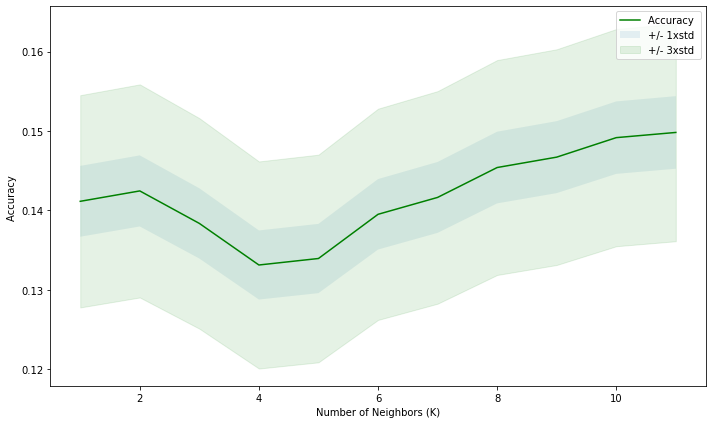

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
M.KNearetsNeighbor()

In [ ]:
M.SupportVectorMachine()

Accuracy: 17.35%
Accuracy: 17.71%
Accuracy: 17.53%
Accuracy: 12.92%
Accuracy of SVM model 18.0% 

best kernel is :  poly
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.00      0.08      0.00        12
           5       0.93      0.18      0.30      5648
           6       0.04      0.17      0.06       208
           7       0.00      0.00      0.00         4
           8       0.04      0.21      0.07       202
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.03      0.00        29

    accuracy                           0.18      6114
   macro avg       0.08      0.05      0.03      6114
weighted avg 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


row_id                                  0
scout_id                                0
winner                                  0
team                                    1
competitionId                           1
player_position_1                      75
player_position_2                      75
player_height                          32
player_weight                          37
player_general_var_0                    0
player_general_var_1                    0
player_general_var_2                    0
player_general_var_3                    0
player_general_var_4                    0
player_general_var_5                    0
player_positional_raw_var_0           211
player_positional_raw_var_1           211
player_positional_raw_var_2           211
player_positional_raw_var_3           211
player_defensive_raw_var_4            211
player_defensive_raw_var_5            211
player_other_raw_var_6                218
player_offensive_raw_var_7            211
player_other_raw_var_8            

In [ ]:
test.shape

(8774, 799)